In [36]:
import csv 
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def extract(filename):
    #get time and temperature from txt file
    results = []
    with open(filename) as tsv:
        for column in zip(*[line for line in csv.reader(tsv, dialect="excel-tab")]):
            columnFloat = []
            for val in list(column):
                columnFloat.append(float(val))
            results.append(columnFloat)
    return results

def onOffParse(data):
    #splits the results from extract() into two lists based on the on/off status
    offX = []
    offY = []
    onX = []
    onY = []
    for i in list(range(len(data[0]))):
        row = [data[0][i], data[1][i], data[2][i]]
        if row[1] == 0:
            offX.append(row[0])
            offY.append(row[2])
        if row[1] == 1:
            onX.append(row[0])
            onY.append(row[2])
    return [[offX, offY],[onX, onY]]

def onOffPlot(data, title="Time vs Temperature of Hotplate"):
    #plots the on and off points as well as conects them with a line
    dataParse = onOffParse(data)
    f = plt.figure()
    plt.plot(data[0], data[2], c='grey', zorder=0)
    plt.scatter(dataParse[0][0], dataParse[0][1], s=50, c='black', zorder=5, label="Hotplate off")
    plt.scatter(dataParse[1][0], dataParse[1][1], s=50, c='red', zorder=10, label="Hotplate on")
    plt.legend(loc="upper left")
    plt.xlabel("Time (sec)")
    plt.ylabel("Temperature (°C)")
    plt.title(title)
    f.savefig(str(title) + ".pdf", bbox_inches='tight')

[  40.92434455 -107.7429158 ]


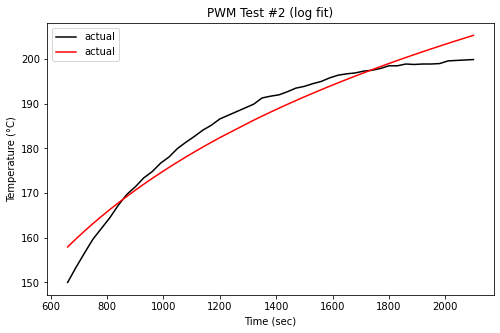

In [58]:
plt.rcParams['figure.figsize'] = [8, 5]

data = extract("PWM_test_2_log_fit.txt")
title = "PWM Test #2 (log fit)"

x = np.array(data[0])
y = np.array(data[1])
print(np.polyfit(np.log(x), y, 1))


f = plt.figure()
#plt.plot([30, 720], [20.6, 440.6], c='red', zorder=0, label = 'calculated')
plt.plot(data[0], data[1], c='black', zorder=0, label = 'actual')
plt.plot(data[0], 40.92434455 * np.log(x) - 107.7429158, c='red', zorder=0, label = 'actual')
#plt.axvline(turnOffTime, color = 'r', label = 'heat turned off')
plt.legend(loc="upper left")
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (°C)")
plt.title(title)
f.savefig(str(title) + ".pdf", bbox_inches='tight')

[  92.79925244 -376.38968617]


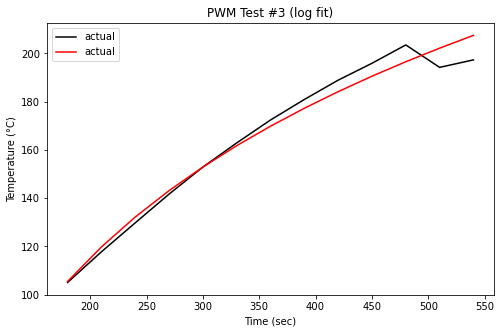

In [62]:
plt.rcParams['figure.figsize'] = [8, 5]

data = extract("PWM_test_3_log_fit.txt")
title = "PWM Test #3 (log fit)"

x = np.array(data[0])
y = np.array(data[1])
print(np.polyfit(np.log(x), y, 1))


f = plt.figure()
#plt.plot([30, 720], [20.6, 440.6], c='red', zorder=0, label = 'calculated')
plt.plot(data[0], data[1], c='black', zorder=0, label = 'actual')
plt.plot(data[0], 92.79925244 * np.log(x) - 376.38968617, c='red', zorder=0, label = 'actual')
#plt.axvline(turnOffTime, color = 'r', label = 'heat turned off')
plt.legend(loc="upper left")
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (°C)")
plt.title(title)
f.savefig(str(title) + ".pdf", bbox_inches='tight')

[1000 1001 1002 ... 2997 2998 2999]


<ipython-input-95-f11b35940f25>:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(data[0], 40.92434455 * np.log(x) - 107.7429158, c='blue', zorder=0, label = 'log fit')


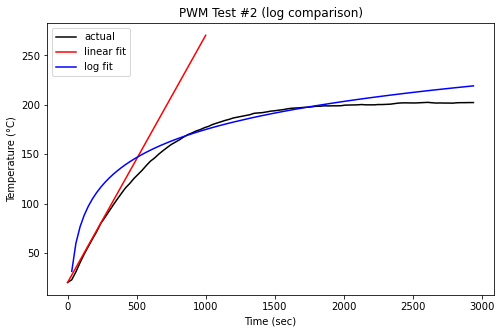

In [95]:
plt.rcParams['figure.figsize'] = [8, 5]

data = extract("PWM_test_2.txt")
title = "PWM Test #2 (log comparison)"

x = np.array(data[0])

logSubsetX = np.array(list(range(1000, 3000)))
print(logSubset)

f = plt.figure()
plt.plot(data[0], data[1], c='black', zorder=0, label = 'actual')
plt.plot([0, 1000], [20.2, 270.2], c='red', zorder=0, label = 'linear fit')
plt.plot(data[0], 40.92434455 * np.log(x) - 107.7429158, c='blue', zorder=0, label = 'log fit')
#plt.plot(logSubsetX, 40.92434455 * np.log(logSubsetX) - 107.7429158, c='red', zorder=0, label = 'log fit')
#plt.axvline(turnOffTime, color = 'r', label = 'heat turned off')
plt.legend(loc="upper left")
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (°C)")
plt.title(title)
f.savefig(str(title) + ".pdf", bbox_inches='tight')

<ipython-input-81-44dfd336c086>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(data[0], 92.79925244 * np.log(x) - 376.38968617, c='blue', zorder=0, label = 'log fit')


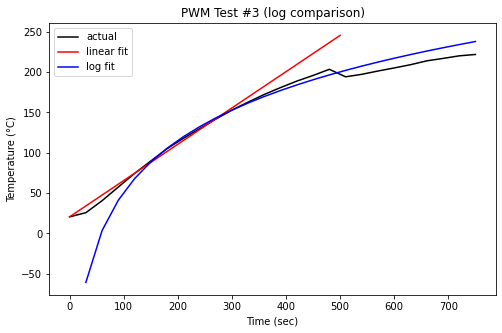

In [81]:
plt.rcParams['figure.figsize'] = [8, 5]

data = extract("PWM_test_3.txt")
title = "PWM Test #3 (log comparison)"

x = np.array(data[0])




f = plt.figure()
plt.plot(data[0], data[1], c='black', zorder=0, label = 'actual')
plt.plot([0, 500], [20.6, 245.6], c='red', zorder=0, label = 'linear fit')
plt.plot(data[0], 92.79925244 * np.log(x) - 376.38968617, c='blue', zorder=0, label = 'log fit')
#plt.axvline(turnOffTime, color = 'r', label = 'heat turned off')
plt.legend(loc="upper left")
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (°C)")
plt.title(title)
f.savefig(str(title) + ".pdf", bbox_inches='tight')

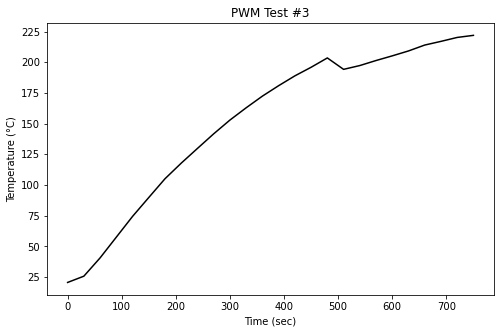

In [26]:
plt.rcParams['figure.figsize'] = [8, 5]

data = extract("PWM_test_3.txt")
title = "PWM Test #3"

f = plt.figure()
#plt.plot([0, 2940], [20.2, 725.8], c='red', zorder=0, label = 'calculated')
plt.plot(data[0], data[1], c='black', zorder=0, label = 'actual')
#plt.axvline(turnOffTime, color = 'r', label = 'heat turned off')
#plt.legend(loc="upper left")
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (°C)")
plt.title(title)
f.savefig(str(title) + ".pdf", bbox_inches='tight')

In [18]:
offLow = extract("off_to_low.txt")
lowMed = extract("low_to_med.txt")
medHigh = extract("med_to_high.txt")

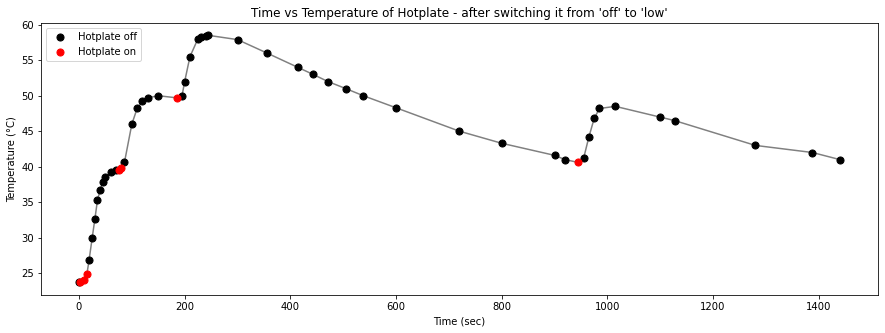

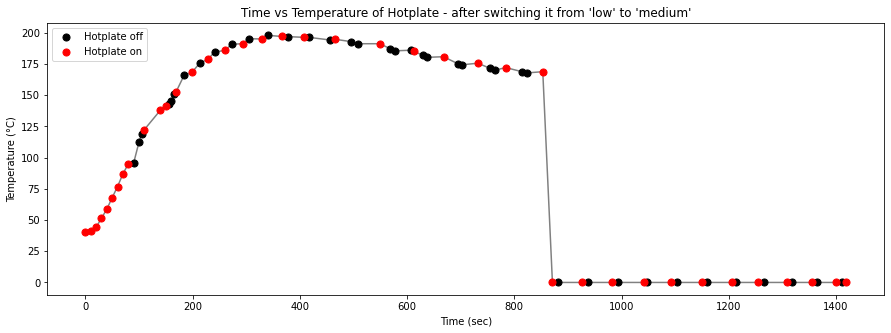

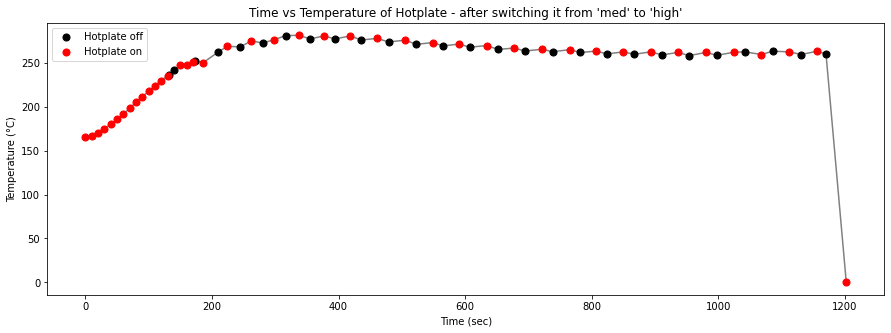

In [19]:
plt.rcParams['figure.figsize'] = [15, 5]

onOffPlot(offLow, "Time vs Temperature of Hotplate - after switching it from 'off' to 'low'")
onOffPlot(lowMed, "Time vs Temperature of Hotplate - after switching it from 'low' to 'medium'")
onOffPlot(medHigh, "Time vs Temperature of Hotplate - after switching it from 'med' to 'high'")

Note that the temperature drops to "zero" because I did not notice that the thermometer turns off when the temperature is stable.

In [34]:
def timeIntervals(data, time=0):
    timeChunks0 = []
    timeChunks1 = []
    onOffStatus = 0
    for i in list(range(len(data[0]))):
        row = [data[0][i], data[1][i], data[2][i]]
        if onOffStatus != row[1] or i == len(data[0]) - 1:
            timeChunks0.append(row[0] - time)
            timeChunks1.append(onOffStatus)
            time = row[0]            
            onOffStatus = row[1]
    return [timeChunks0, timeChunks1]

def timeIntParse(timeInt):
    #splits the results from timeIntervals() into two lists based on the on/off status
    offX = []
    offY = []
    onX = []
    onY = []
    for i in list(range(len(timeInt[0]))):
        row = [timeInt[0][i], timeInt[1][i]]
        if row[1] == 0:
            offX.append(i + 1)
            offY.append(row[0])
        if row[1] == 1:
            onX.append(i + 1)
            onY.append(row[0])
    return [[offX, offY],[onX, onY]]

def timeIntPlot(data, title="Time of On/Off Intervals of Hotplate", time=0):
    #plots the on and off time intervals as bar graphs
    dataParse = timeIntParse(timeIntervals(data, time))
    #plt.show()
    f = plt.figure()
    ax = f.add_axes([0,0,1,1])
    ax.bar(dataParse[0][0], dataParse[0][1], color='black', label="Hotplate off")
    ax.bar(dataParse[1][0], dataParse[1][1], color='red', label="Hotplate on")
    plt.legend(loc="upper left")
    plt.xlabel("Intervals")
    plt.ylabel("Time (sec)")
    plt.title(title)
    f.savefig(str(title) + ".pdf", bbox_inches='tight')

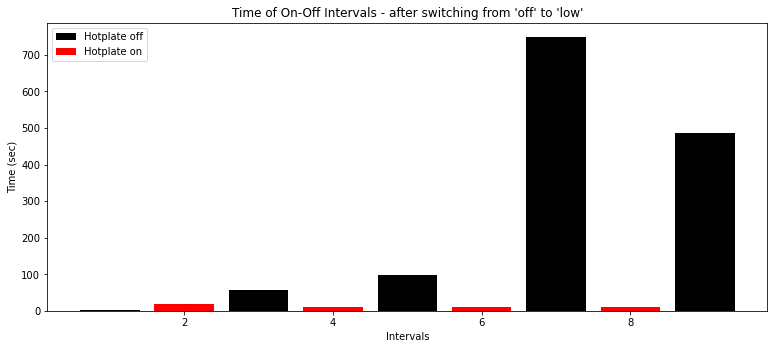

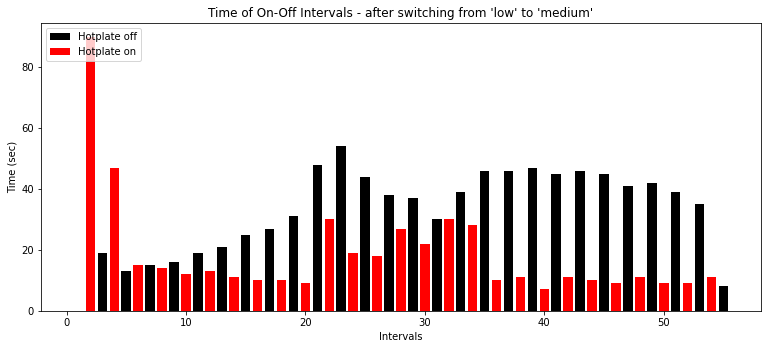

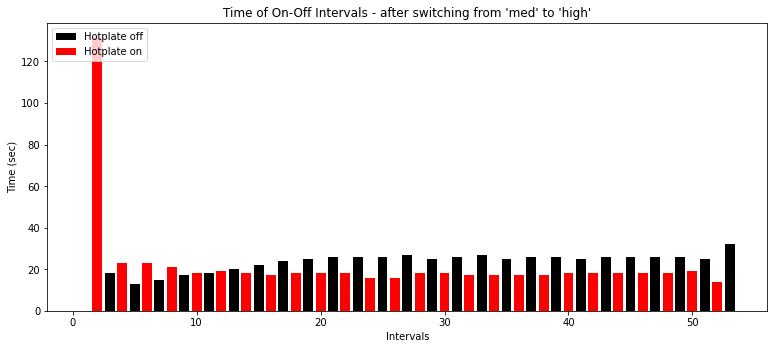

In [37]:
plt.rcParams['figure.figsize'] = [10, 4]
timeIntPlot(offLow, "Time of On-Off Intervals - after switching from 'off' to 'low'")
timeIntPlot(lowMed, "Time of On-Off Intervals - after switching from 'low' to 'medium'")
timeIntPlot(medHigh, "Time of On-Off Intervals - after switching from 'med' to 'high'")

In [27]:
#From offLow, we know the lag between when the heating starts and the plate reaches the intended temperature
#The plateau time probably varies with the heat of the plate, but let us assume it does not

#This plateau occurs 4 times in my offLow data, which I can find by manual inspection of the data
#Heating [X]: [index of heating start], [index of heating stop], [index of peak temperature after heating]
#Heating 1: 1, 4, 13
#Heating 2: 13, 15, 21
#Heating 3: 21, 22, 28
#Heating 4: 41, 42, 46

def tempPerSecHeat(data, start, stop, peak):
    #prints the temp increase per sec of heat as well as other related numbers
    print("Start heat (time, temp): " + str(data[0][start]) + ", " + str(data[2][start]))
    print("Stop heat (time, temp): " + str(data[0][stop]) + ", " + str(data[2][stop]))
    print("Reach peak (time, temp): " + str(data[0][peak]) + ", " + str(data[2][peak]))
    heatTime = data[0][stop] - data[0][start]
    print("Heat time: " + str(heatTime))
    timeToPeak = data[0][peak] - data[0][start]
    tempChange = data[2][peak] - data[2][start]
    print("Change from start to peak (time, temp): " + str(timeToPeak) + ", " + str(tempChange))
    #print("Percent increase (peak/start): " + str((data[2][peak] - data[2][start]) / data[2][start]))
    #print("Percent increase - normalized (peak/start/heat_time): " + str((data[2][peak] - data[2][start]) / data[2][start] / heatTime))
    print("Temp change per heat time: " + str(tempChange / heatTime))
    print("Rate of temp change: " + str(tempChange / timeToPeak))
    print("^ but normalized with heat time: " + str(tempChange / timeToPeak / heatTime))
    
tempPerSecHeat(offLow, 1, 4, 13)
print("")
tempPerSecHeat(offLow, 13, 15, 20)
print("")
tempPerSecHeat(offLow, 21, 22, 28)
print("")
tempPerSecHeat(offLow, 41, 42, 46)

Start heat (time, temp): 1.0, 23.8
Stop heat (time, temp): 19.0, 26.8
Reach peak (time, temp): 75.0, 39.6
Heat time: 18.0
Change from start to peak (time, temp): 74.0, 15.8
Temp change per heat time: 0.8777777777777778
Rate of temp change: 0.21351351351351353
^ but normalized with heat time: 0.011861861861861863

Start heat (time, temp): 75.0, 39.6
Stop heat (time, temp): 86.0, 40.6
Reach peak (time, temp): 150.0, 50.0
Heat time: 11.0
Change from start to peak (time, temp): 75.0, 10.399999999999999
Temp change per heat time: 0.9454545454545453
Rate of temp change: 0.13866666666666666
^ but normalized with heat time: 0.012606060606060605

Start heat (time, temp): 185.0, 49.7
Stop heat (time, temp): 195.0, 50.0
Reach peak (time, temp): 245.0, 58.5
Heat time: 10.0
Change from start to peak (time, temp): 60.0, 8.799999999999997
Temp change per heat time: 0.8799999999999997
Rate of temp change: 0.1466666666666666
^ but normalized with heat time: 0.014666666666666661

Start heat (time, temp)

In [37]:
aveTempChange = (0.8777777777777778 + 0.9454545454545453 + 0.8799999999999997 + 0.7899999999999998) / 4
aveTimeToPeak = (74.0 + 75.0 + 60.0 + 70.0) / 4
aveRateOfChange = aveTempChange / aveTimeToPeak
print("Average 'temp change per heat time': " + str(aveTempChange))
print("Average 'change from start to peak (time)': "+ str(aveTimeToPeak))
print("Average 'rate of temp change': "+ str(aveRateOfChange))

Average 'temp change per heat time': 0.8733080808080806
Average 'change from start to peak (time)': 69.75
Average 'rate of temp change': 0.012520545961406174


In English, 1 second of the hot plate being on corresponds to a roughly 0.9°C temperature increase over 70 seconds. This corresponds to about 0.0125°C per sec.

2 options:
1 - maintain temp
2 - increase temp
ADD AN OPTION TO SET CUSTOM START TEMP

increase temp by providing:
1 - final temp + time to reach that temp 
2 - final temp + rate of temp increase
3 - rate of temp increase + time to reach that temp

the program needs to keep track of the current temp (mathematically)

Miscellaneous data analysis

In [7]:
#Estimating time intervals for maintanining ~165-170
#cut off first 55 data points of lowMed so we just get the roughly constant portion
start = 55
end = len(lowMed[0]) - 1
lowMedArray = np.array(lowMed)
cutLowMed = lowMedArray[:,start:end].tolist()
cLMParse = timeIntParse(timeIntervals(cutLowMed, lowMed[0][startIndex - 1]))
print("Medium temperature maintenance cycle")
aveOff = sum(cLMParse[0][1]) / len(cLMParse[0][1])
aveOn = sum(cLMParse[1][1]) / len(cLMParse[1][1])
print("Average time off: " + str(aveOff))
print("Average time on: " + str(aveOn))
print("Total average cycle time: " + str(aveOff + aveOn))

NameError: name 'startIndex' is not defined

In [8]:
#Estimating time intervals for maintanining ~260
#cut off first 55 data points of medHigh so we just get the roughly constant portion
start = 23
end = len(medHigh[0])
medHighArray = np.array(medHigh)
cutMedHigh = medHighArray[:,start:end].tolist()
cMHParse = timeIntParse(timeIntervals(cutMedHigh, medHigh[0][start - 1]))
print("High temperature maintenance cycle")
aveOff = sum(cMHParse[0][1]) / len(cMHParse[0][1])
aveOn = sum(cMHParse[1][1]) / len(cMHParse[1][1])
print("Average time off: " + str(aveOff))
print("Average time on: " + str(aveOn))
print("Total average cycle time: " + str(aveOff + aveOn))

High temperature maintenance cycle
Average time off: 25.782608695652176
Average time on: 17.5
Total average cycle time: 43.28260869565217


In [17]:
def dispChange(data, before, after):
    #the following values need to be found be manualy inspecting the data
    #the goal is to find out the change in temp from 10 seconds of heating
    #pick some stretch of time when the hot plate is on for 10 seconds
    #before = the index in the data for 30 seconds after the heating starts
    #after = the index in the data for 40 seconds after the heating starts (or 30 seconds after it stops)
    #these can be rough times, this is only for estimation purposes
    print("Before heating:")
    print("Time - " + str(data[0][before]))
    print("Temp - " + str(data[2][before]))
    print("After heating for ~10 seconds:")
    print("Time - " + str(data[0][after]))
    print("Temp - " + str(data[2][after]))
    print("Change:")
    print("Time - " + str(data[0][after] - data[0][before]))
    print("Temp - " + str(data[2][after] - data[2][before]))
    print("Temp per sec of heating - " + str((data[2][after] - data[2][before]) / (data[0][after] - data[0][before])))

In [18]:
#how about this
#temp change from trueStart to 
#from offLow, we know how long it takes for the heat to platue after the heat turns off
#let's call that X
#we find the temp change from start to X and divide it by the time the hot plate was on
#so that should tell you how much Y seconds of heat will increase the temperature
#you also need to factor this historecis into the calculation
#what about the 30 seconds for the thermometer? I think that's just for big temperature shifts
#shouldn't it not be as slow for small ones? I guess I can play around with the numbers

#once I know the temp change from time Y of being on (and how long the delay to that temp change)
#I can use that to estimate if I want Z temp/sec, how frequently on and off do I want
#I'm limited by how slow/fast the heat changes for the plate
#I can also estimate the interval for maintance temperature from the above

#A BIG NOTE IS THAT ONCE YOU GO UP, IT'S VERY HARD TO COOL DOWN
#SO ASSUME THAT YOU CANNOT CONTROL THE COOLING SPEED (WHICH IS PRETTY SLOW ANYWAYS)
#MAYBE RECORD THE HOT PLATE BEING ON FOR X SECONDS THEN MANUALLY TURN IT OFF AND SEE THE SLOPE



print("Off to Low")
print("")
#dispChange(offLow, 6, 8)
dispChange(offLow, 1, 4)
print("")
#dispChange(offLow, 17, 18)
dispChange(offLow, 13, 15)
print("")
print("Low to Medium")
print("")
#dispChange(lowMed, 3, 4)
dispChange(lowMed, 0, 2)
print("Medium to High")
print("")
#dispChange(medHigh, 3, 4)
dispChange(medHigh, 0, 2)

Off to Low

Before heating:
Time - 1.0
Temp - 23.8
After heating for ~10 seconds:
Time - 19.0
Temp - 26.8
Change:
Time - 18.0
Temp - 3.0
Temp per sec of heating - 0.16666666666666666

Before heating:
Time - 75.0
Temp - 39.6
After heating for ~10 seconds:
Time - 86.0
Temp - 40.6
Change:
Time - 11.0
Temp - 1.0
Temp per sec of heating - 0.09090909090909091

Low to Medium

Before heating:
Time - 0.0
Temp - 40.6
After heating for ~10 seconds:
Time - 20.0
Temp - 44.2
Change:
Time - 20.0
Temp - 3.6000000000000014
Temp per sec of heating - 0.18000000000000008
Medium to High

Before heating:
Time - 0.0
Temp - 166.0
After heating for ~10 seconds:
Time - 20.0
Temp - 169.9
Change:
Time - 20.0
Temp - 3.9000000000000057
Temp per sec of heating - 0.19500000000000028


In [11]:
#Attempting to see how the temperature change from x seconds of heat correlates with current plate tempearture
#~30 seconds after being on for ~10 seconds
#where 30 seconds comes from the lag in the thermometer
#The time doesn't have to be exact since this is only an estimate to get an idea of how fast it heats up

#HERE'S WHAT YOU NEED TO CHANGE
#YOU WANT THE TEMP 30 SECONDS AFTER THE START OF THE HEAT WHICH YOU THEN SUBTRACT FROM THE TEMP 30 SECONDS AFTER THE END OF THE HEAT 


    
    

print("Off to Low")
print("")
print("Before heating:")
print("Time - " + str(offLow[0][1]))
print("Temp - " + str(offLow[2][1]))
print("After heating for ~20 seconds:")
print("Time - " + str(offLow[0][4]))
print("Temp - " + str(offLow[2][4]))
print("After another ~30 seconds pass:")
print("Time - " + str(offLow[0][10]))
print("Temp - " + str(offLow[2][10]))
print("Change:")
print("Temp - " + str(offLow[2][10] - offLow[2][1]))
print("/sec of heating - " + str((offLow[2][10] - offLow[2][1]) / (offLow[0][4] - offLow[0][1])))
print("")
print("Before heating:")
print("Time - " + str(offLow[0][13]))
print("Temp - " + str(offLow[2][13]))
print("After heating for ~10 seconds:")
print("Time - " + str(offLow[0][15]))
print("Temp - " + str(offLow[2][15]))
print("After another ~30 seconds pass:")
print("Time - " + str(offLow[0][18]))
print("Temp - " + str(offLow[2][18]))
print("Change:")
print("Temp - " + str(offLow[2][18] - offLow[2][13]))
print("/sec of heating - " + str((offLow[2][18] - offLow[2][13]) / (offLow[0][15] - offLow[0][13])))

Off to Low

Before heating:
Time - 1.0
Temp - 23.8
After heating for ~20 seconds:
Time - 19.0
Temp - 26.8
After another ~30 seconds pass:
Time - 50.0
Temp - 38.5
Change:
Temp - 14.7
/sec of heating - 0.8166666666666667

Before heating:
Time - 75.0
Temp - 39.6
After heating for ~10 seconds:
Time - 86.0
Temp - 40.6
After another ~30 seconds pass:
Time - 120.0
Temp - 49.2
Change:
Temp - 9.600000000000001
/sec of heating - 0.8727272727272729


In [12]:
print("Low to Med")
print("")
print("Before heating:")
print("Time - " + str(lowMed[0][0]))
print("Temp - " + str(lowMed[2][0]))
print("After heating for ~20 seconds:")
print("Time - " + str(lowMed[0][2]))
print("Temp - " + str(lowMed[2][2]))
print("After another ~30 seconds pass:")
print("Time - " + str(lowMed[0][5]))
print("Temp - " + str(lowMed[2][5]))
print("Change:")
print("Temp - " + str(lowMed[2][5] - lowMed[2][2]))
print("/sec of heating - " + str((lowMed[2][5] - lowMed[2][2]) / (lowMed[0][2] - lowMed[0][0])))
print("")
print("Before heating:")
print("Time - " + str(lowMed[0][5]))
print("Temp - " + str(lowMed[2][5]))
print("After heating for ~20 seconds:")
print("Time - " + str(lowMed[0][7]))
print("Temp - " + str(lowMed[2][7]))
print("After another ~30 seconds pass:")
print("Time - " + str(lowMed[0][10]))
print("Temp - " + str(lowMed[2][10]))
print("Change:")
print("Temp - " + str(lowMed[2][10] - lowMed[2][7]))
print("/sec of heating - " + str((lowMed[2][10] - lowMed[2][7]) / (lowMed[0][7] - lowMed[0][5])))

Low to Med

Before heating:
Time - 0.0
Temp - 40.6
After heating for ~20 seconds:
Time - 20.0
Temp - 44.2
After another ~30 seconds pass:
Time - 50.0
Temp - 67.9
Change:
Temp - 23.700000000000003
/sec of heating - 1.185

Before heating:
Time - 50.0
Temp - 67.9
After heating for ~20 seconds:
Time - 70.0
Temp - 86.9
After another ~30 seconds pass:
Time - 100.0
Temp - 112.4
Change:
Temp - 25.5
/sec of heating - 1.275


In [13]:
print("Med to High")
print("")
print("Before heating:")
print("Time - " + str(medHigh[0][0]))
print("Temp - " + str(medHigh[2][0]))
print("After heating for ~20 seconds:")
print("Time - " + str(medHigh[0][2]))
print("Temp - " + str(medHigh[2][2]))
print("After another ~30 seconds pass:")
print("Time - " + str(medHigh[0][5]))
print("Temp - " + str(medHigh[2][5]))
print("Change:")
print("Temp - " + str(medHigh[2][5] - medHigh[2][0]))
print("/sec of heating - " + str((medHigh[2][5] - medHigh[2][0]) / (medHigh[0][2] - medHigh[0][0])))
print("")
print("Before heating:")
print("Time - " + str(medHigh[0][5]))
print("Temp - " + str(medHigh[2][5]))
print("After heating for ~20 seconds:")
print("Time - " + str(medHigh[0][7]))
print("Temp - " + str(medHigh[2][7]))
print("After another ~30 seconds pass:")
print("Time - " + str(medHigh[0][10]))
print("Temp - " + str(medHigh[2][10]))
print("Change:")
print("Temp - " + str(medHigh[2][10] - medHigh[2][5]))
print("/sec of heating - " + str((medHigh[2][10] - medHigh[2][5]) / (medHigh[0][7] - medHigh[0][5])))

Med to High

Before heating:
Time - 0.0
Temp - 166.0
After heating for ~20 seconds:
Time - 20.0
Temp - 169.9
After another ~30 seconds pass:
Time - 50.0
Temp - 185.6
Change:
Temp - 19.599999999999994
/sec of heating - 0.9799999999999998

Before heating:
Time - 50.0
Temp - 185.6
After heating for ~20 seconds:
Time - 70.0
Temp - 198.0
After another ~30 seconds pass:
Time - 100.0
Temp - 217.5
Change:
Temp - 31.900000000000006
/sec of heating - 1.5950000000000002
